In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

data = pd.read_csv('/content/drive/MyDrive/Car Evaluation/car_evaluation.csv', names=column_names)

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,med,2,4,big,low,unacc
1,vhigh,med,2,4,big,med,acc
2,vhigh,med,2,4,big,high,acc
3,vhigh,med,2,more,small,low,unacc
4,vhigh,med,2,more,small,med,unacc


In [5]:

print(data.info())
print("\nMissing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741 entries, 0 to 1740
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1741 non-null   object
 1   maint     1741 non-null   object
 2   doors     1741 non-null   object
 3   persons   1741 non-null   object
 4   lug_boot  1741 non-null   object
 5   safety    1741 non-null   object
 6   class     1741 non-null   object
dtypes: object(7)
memory usage: 95.3+ KB
None

Missing values:
 buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


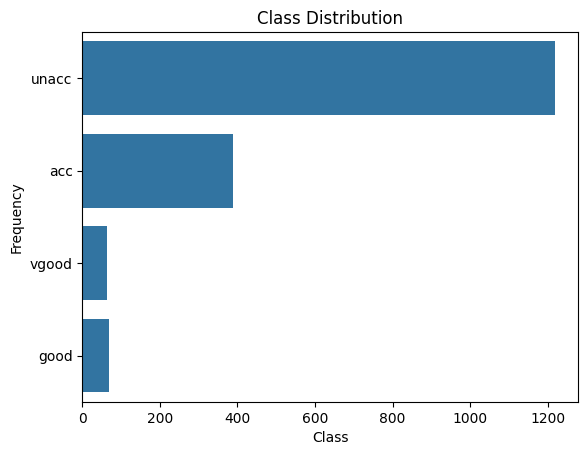

In [6]:

sns.countplot(data['class'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [7]:
# Encoding categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,2,0,1,0,1,2
1,3,2,0,1,0,2,0
2,3,2,0,1,0,0,0
3,3,2,0,2,2,1,2
4,3,2,0,2,2,2,2


In [8]:

X = data.drop('class', axis=1)
y = data['class']


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Initialize KNN with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [11]:

y_pred = knn.predict(X_test)


In [12]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.875717017208413

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       119
           1       0.64      0.43      0.51        21
           2       0.92      0.98      0.95       363
           3       0.92      0.55      0.69        20

    accuracy                           0.88       523
   macro avg       0.81      0.66      0.72       523
weighted avg       0.87      0.88      0.87       523



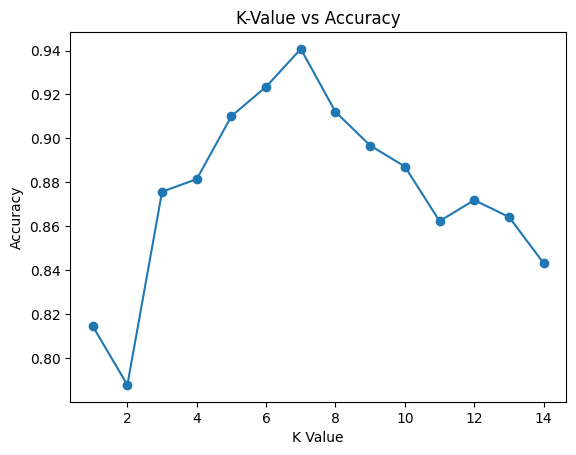

In [13]:
# Trying different values of k to find the optimal one
k_values = range(1, 15)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred_k))

# Plotting k vs accuracy
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K-Value vs Accuracy")
plt.show()


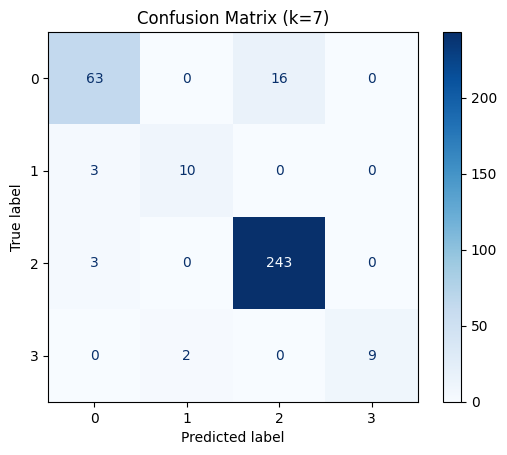

Classification Report (k=7):
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        79
           1       0.83      0.77      0.80        13
           2       0.94      0.99      0.96       246
           3       1.00      0.82      0.90        11

    accuracy                           0.93       349
   macro avg       0.92      0.84      0.88       349
weighted avg       0.93      0.93      0.93       349



In [15]:

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNeighborsClassifier with k=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)
cm_display.plot(cmap="Blues")
plt.title("Confusion Matrix (k=7)")
plt.show()

print("Classification Report (k=7):")
print(classification_report(y_test, y_pred))
